# SQL Queries & Data Visualization in Maven Datasets

# About dataset

Maven datasets merupakan situs penyedia dataset open source yang dapat digunakan untuk keperluan analisis dan visualisasi data. Di sini, saya menggunakan Pizza Place Sales. Pizza Place Sales merupakan dataset yang berisi tentang penjualan selama setahun dari tempat pizza fiktif, termasuk tanggal dan waktu setiap pesanan dan pizza yang disajikan, dengan rincian tambahan tentang jenis, ukuran, jumlah, harga, dan bahan. Dataset ini dapat diakses melalui link:
[Pizza Place Sales](https://mavenanalytics.io/data-playground?order=date_added%2Cdesc&search=pizza%20place%20sales).

# Library

In [1]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
from datetime import datetime

# Read in CSV files

In [2]:
order_details = pd.read_csv('/kaggle/input/pizza-place-sales/order_details.csv')
orders = pd.read_csv('/kaggle/input/pizza-place-sales/orders.csv')
pizza_types = pd.read_csv('/kaggle/input/pizza-place-sales/pizza_types.csv', encoding= 'unicode_escape')
pizzas = pd.read_csv('/kaggle/input/pizza-place-sales/pizzas.csv')

# Create database connection

In [3]:
db = sql.connect('pizza-place-sales.db')

# Insert data into database


In [4]:
print("number of rows in order_details: " + str(order_details.to_sql('order_details', db, if_exists='replace', index=False)))
print("number of rows in orders: " + str(orders.to_sql('orders', db, if_exists='replace', index=False)))
print("number of rows in pizza_types: " + str(pizza_types.to_sql('pizza_types', db, if_exists='replace', index=False)))
print("number of rows in pizzas: " + str(pizzas.to_sql('pizzas', db, if_exists='replace', index=False)))

number of rows in order_details: 48620
number of rows in orders: 21350
number of rows in pizza_types: 32
number of rows in pizzas: 96


# Show tables

In [5]:
q1 = '''
SELECT * FROM order_details;
'''

df1 = pd.read_sql_query(q1, db)
df1.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [6]:
tipe_data_1 = df1.dtypes
dimensi_tabel_1 = df1.shape

print("tipe data: ")
print(tipe_data_1)
print("dimensi tabel: ", dimensi_tabel_1)

tipe data: 
order_details_id     int64
order_id             int64
pizza_id            object
quantity             int64
dtype: object
dimensi tabel:  (48620, 4)


In [7]:
q2 = '''
SELECT * FROM orders;
'''

df2 = pd.read_sql_query(q2, db)
df2.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [8]:
tipe_data_2 = df2.dtypes
dimensi_tabel_2 = df2.shape

print("tipe data: ")
print(tipe_data_2)
print("dimensi tabel: ", dimensi_tabel_2)

tipe data: 
order_id     int64
date        object
time        object
dtype: object
dimensi tabel:  (21350, 3)


In [9]:
q3 = '''
SELECT * FROM pizza_types;
'''

df3 = pd.read_sql_query(q3, db)
df3.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [10]:
tipe_data_3 = df3.dtypes
dimensi_tabel_3 = df3.shape

print("tipe data: ")
print(tipe_data_3)
print("dimensi tabel: ", dimensi_tabel_3)

tipe data: 
pizza_type_id    object
name             object
category         object
ingredients      object
dtype: object
dimensi tabel:  (32, 4)


In [11]:
q4 = '''
SELECT * FROM pizzas;
'''

df4 = pd.read_sql_query(q4, db)
df4.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [12]:
tipe_data_4 = df4.dtypes
dimensi_tabel_4 = df4.shape

print("tipe data: ")
print(tipe_data_4)
print("dimensi tabel: ", dimensi_tabel_4)

tipe data: 
pizza_id          object
pizza_type_id     object
size              object
price            float64
dtype: object
dimensi tabel:  (96, 4)


# Analysis

# Join all table

In [13]:
query1 = '''
SELECT
STRFTIME('%Y %m %d', t2.date) AS date, 
STRFTIME('%H %M %S', t2.time) AS time, 
t1.order_details_id, 
t1.order_id, 
t1.pizza_id, 
t3.pizza_type_id, 
t3.name, 
t3.category, 
t4.size, 
t4.price, 
t1.quantity
FROM order_details AS t1
JOIN pizzas AS t4 ON t1.pizza_id = t4.pizza_id
JOIN pizza_types AS t3 ON t4.pizza_type_id = t3.pizza_type_id
JOIN orders AS t2 ON t1.order_id = t2.order_id
ORDER BY date, time;
'''

result1 = pd.read_sql_query(query1, db)
result1.head()

,date,time,order_details_id,order_id,pizza_id,pizza_type_id,name,category,size,price,quantity
0,2015 01 01,11 38 36,1,1,hawaiian_m,hawaiian,The Hawaiian Pizza,Classic,M,13.25,1
1,2015 01 01,11 57 40,2,2,classic_dlx_m,classic_dlx,The Classic Deluxe Pizza,Classic,M,16.00,1
2,2015 01 01,11 57 40,3,2,five_cheese_l,five_cheese,The Five Cheese Pizza,Veggie,L,18.50,1
3,2015 01 01,11 57 40,4,2,ital_supr_l,ital_supr,The Italian Supreme Pizza,Supreme,L,20.75,1
4,2015 01 01,11 57 40,5,2,mexicana_m,mexicana,The Mexicana Pizza,Veggie,M,16.00,1


# Total pizza sales

In [14]:
query2 = '''
SELECT
CONCAT(t2.date, " ", t2.time) AS date_time, 
t1.order_id, 
SUM(t4.price*t1.quantity) AS total_price
FROM order_details AS t1
JOIN pizzas AS t4 ON t1.pizza_id = t4.pizza_id
JOIN pizza_types AS t3 ON t4.pizza_type_id = t3.pizza_type_id
JOIN orders AS t2 ON t1.order_id = t2.order_id
GROUP BY t1.order_id
ORDER BY date_time;
'''

result2 = pd.read_sql_query(query2, db)
result2.head()

,date_time,order_id,total_price
0,2015-01-01 11:38:36,1,13.25
1,2015-01-01 11:57:40,2,92.00
2,2015-01-01 12:12:28,3,37.25
3,2015-01-01 12:16:31,4,16.50
4,2015-01-01 12:21:30,5,16.50


In [15]:
result2['date_time'] = pd.to_datetime(result2['date_time'])

In [16]:
result2.dtypes

date_time      datetime64[ns]
order_id                int64
total_price           float64
dtype: object

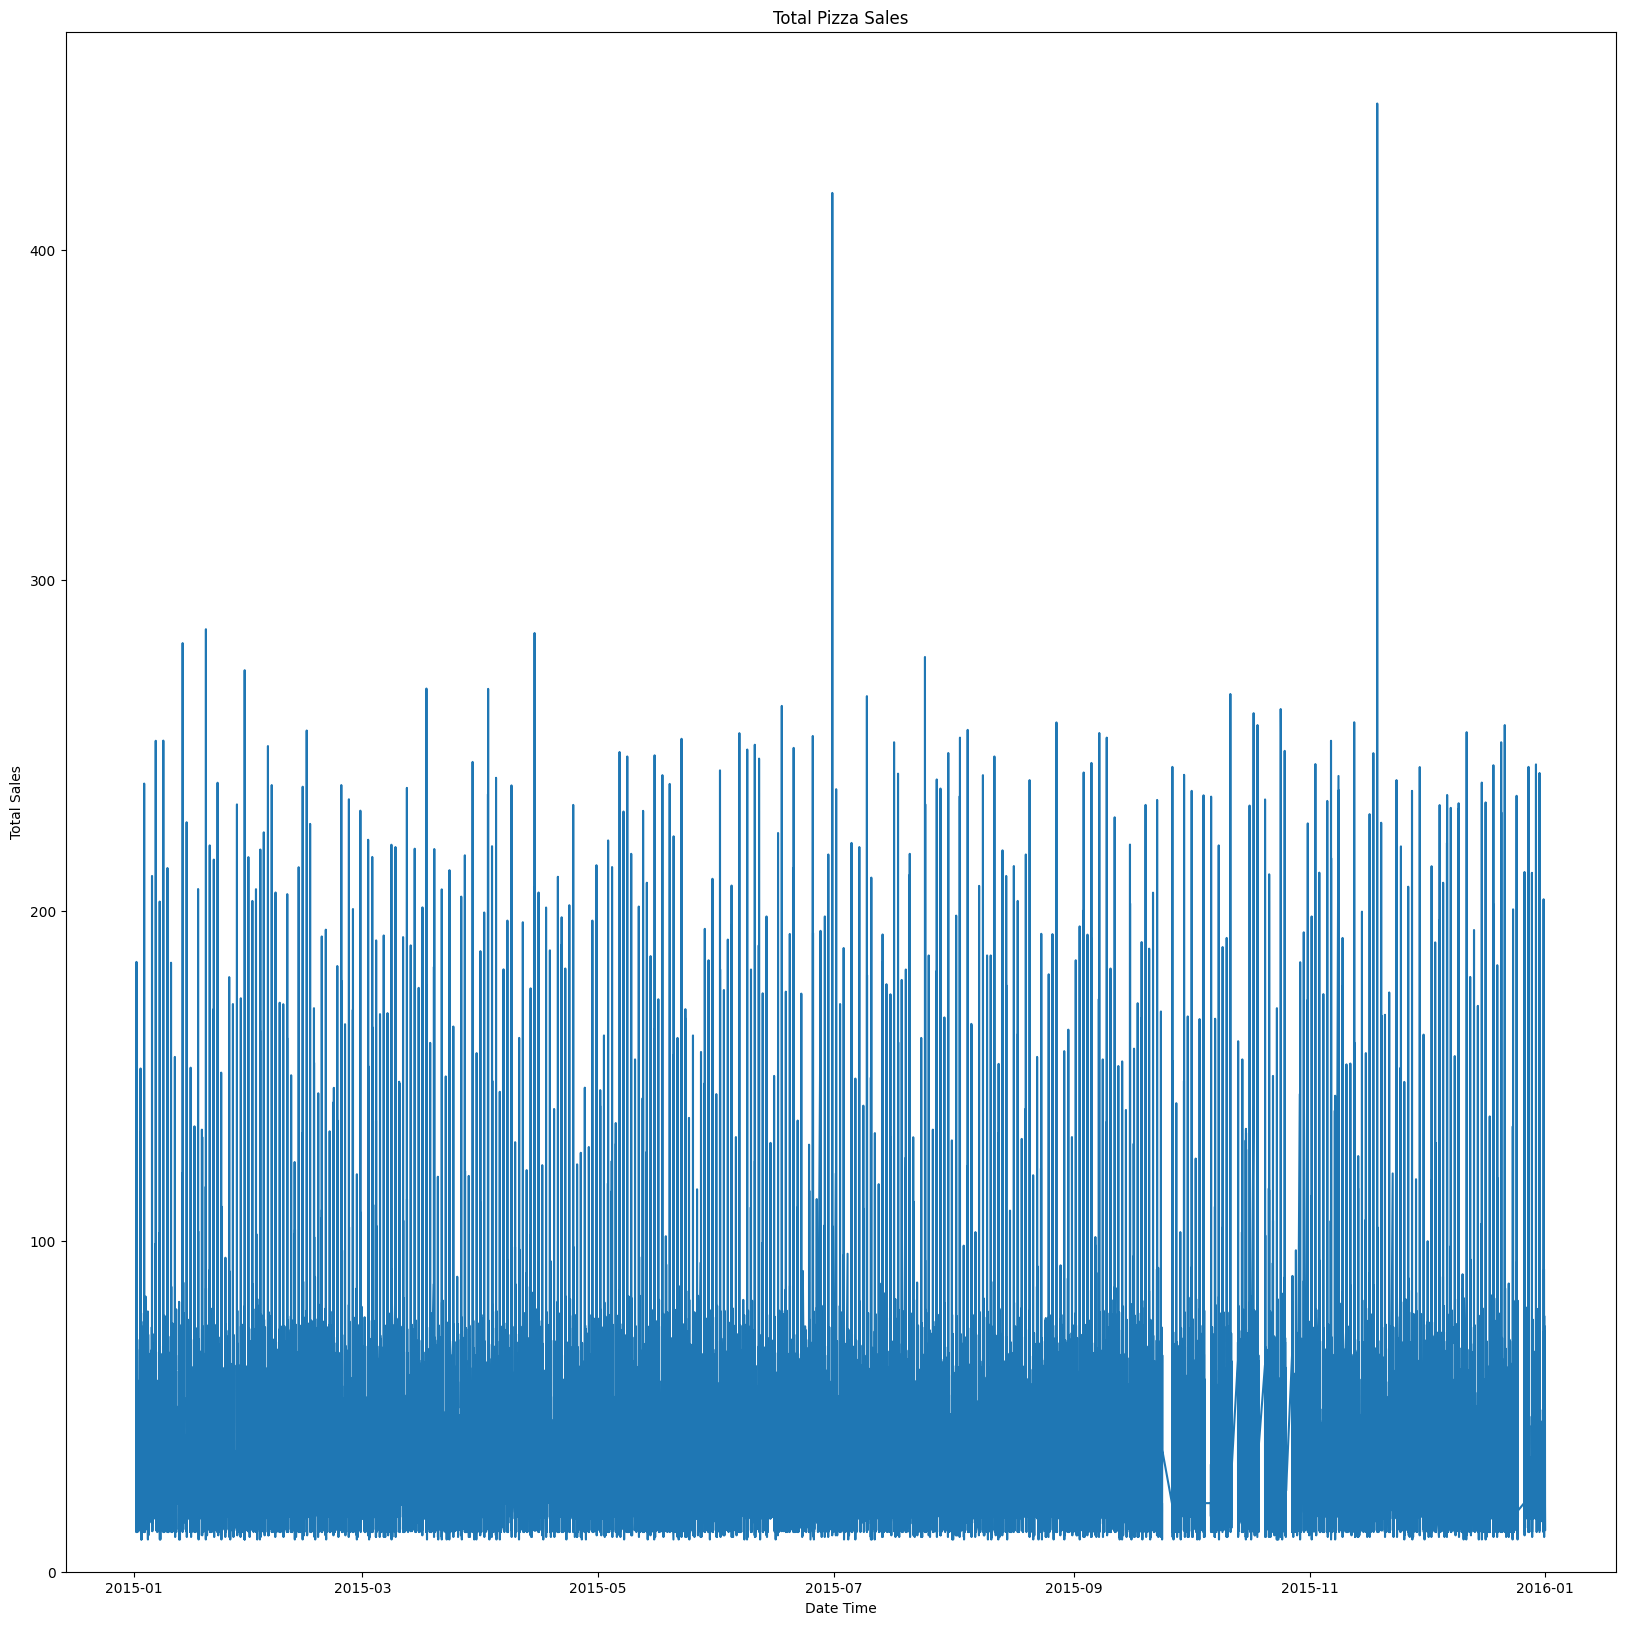

In [17]:
plt.subplots(figsize=(20, 20))

plt.plot(result2['date_time'], result2['total_price'])
plt.title('Total Pizza Sales')
plt.xlabel('Date Time')
plt.ylabel('Total Sales')
plt.ylim(bottom = 0)

plt.show()

# Total pizza sales per day

In [18]:
query3 = '''
SELECT
STRFTIME('%Y %m %d', t2.date) AS date, 
SUM(t4.price*t1.quantity) AS total_price
FROM order_details AS t1
JOIN pizzas AS t4 ON t1.pizza_id = t4.pizza_id
JOIN pizza_types AS t3 ON t4.pizza_type_id = t3.pizza_type_id
JOIN orders AS t2 ON t1.order_id = t2.order_id
GROUP BY date
ORDER BY date;
'''

result3 = pd.read_sql_query(query3, db)
result3.head()

,date,total_price
0,2015 01 01,2713.85
1,2015 01 02,2731.90
2,2015 01 03,2662.40
3,2015 01 04,1755.45
4,2015 01 05,2065.95


In [19]:
result3['date'] = pd.to_datetime(result3['date'])

In [20]:
result3.dtypes

date           datetime64[ns]
total_price           float64
dtype: object

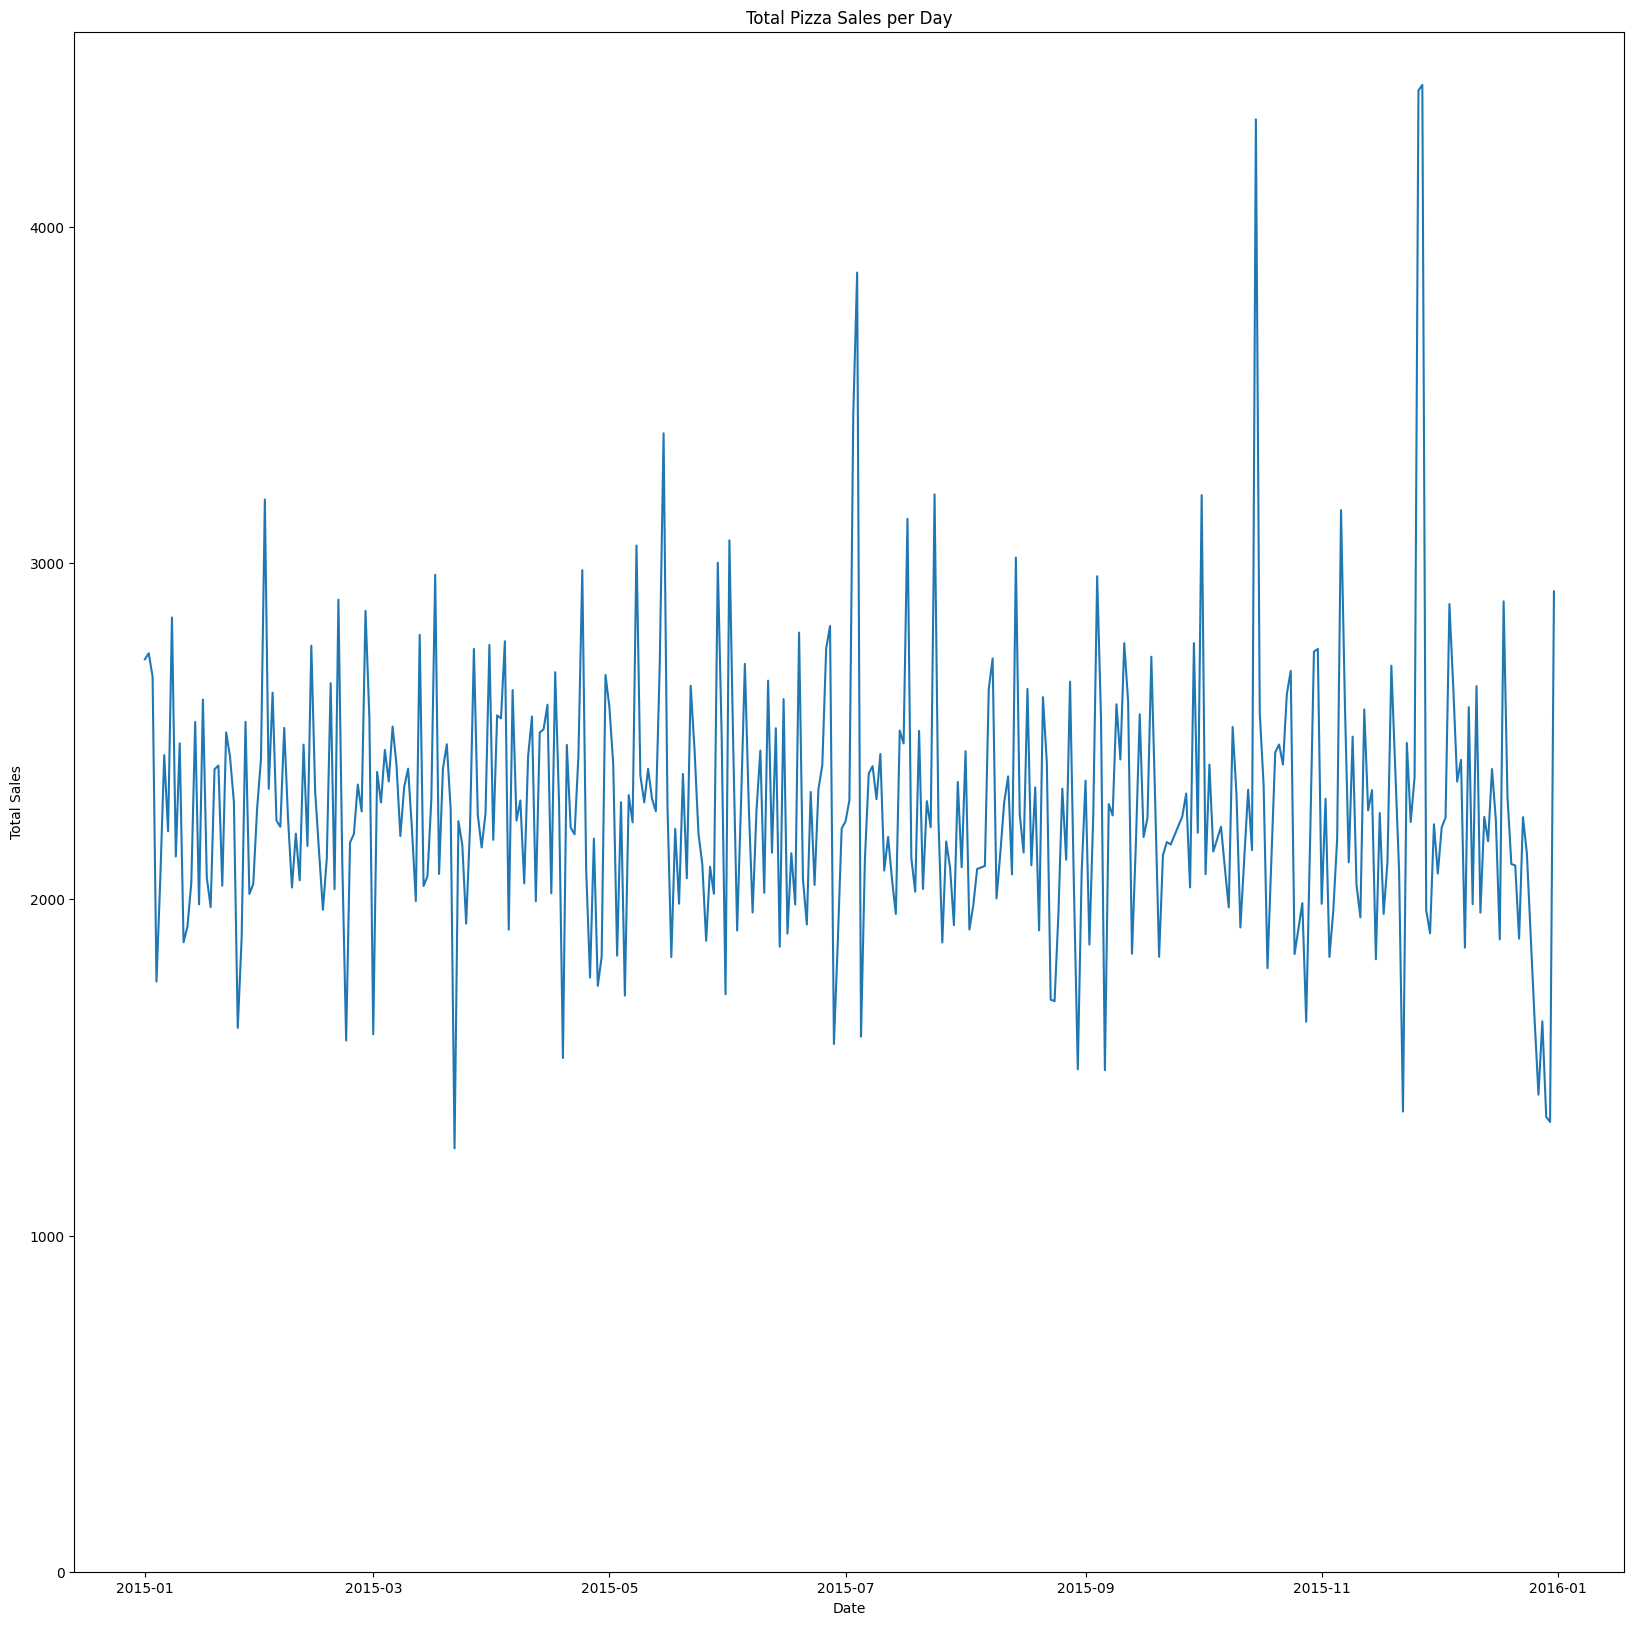

In [21]:
plt.subplots(figsize=(20, 20))

plt.plot(result3['date'], result3['total_price'])
plt.title('Total Pizza Sales per Day')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.ylim(bottom = 0)

plt.show()

# Total pizza sales per week

In [22]:
query4 = '''
SELECT
STRFTIME('%V', t2.date) AS week, 
SUM(t4.price*t1.quantity) AS total_price
FROM order_details AS t1
JOIN pizzas AS t4 ON t1.pizza_id = t4.pizza_id
JOIN pizza_types AS t3 ON t4.pizza_type_id = t3.pizza_type_id
JOIN orders AS t2 ON t1.order_id = t2.order_id
GROUP BY week
ORDER BY week;
'''

result4 = pd.read_sql_query(query4, db)
result4.head()

,week,total_price
0,01,9863.60
1,02,15999.05
2,03,15115.95
3,04,15652.80
4,05,16351.10


In [23]:
week = result4['week'].unique()
result4['week'] = pd.Categorical(result4['week'], categories = week, ordered = True)

In [24]:
result4.dtypes

week           category
total_price     float64
dtype: object

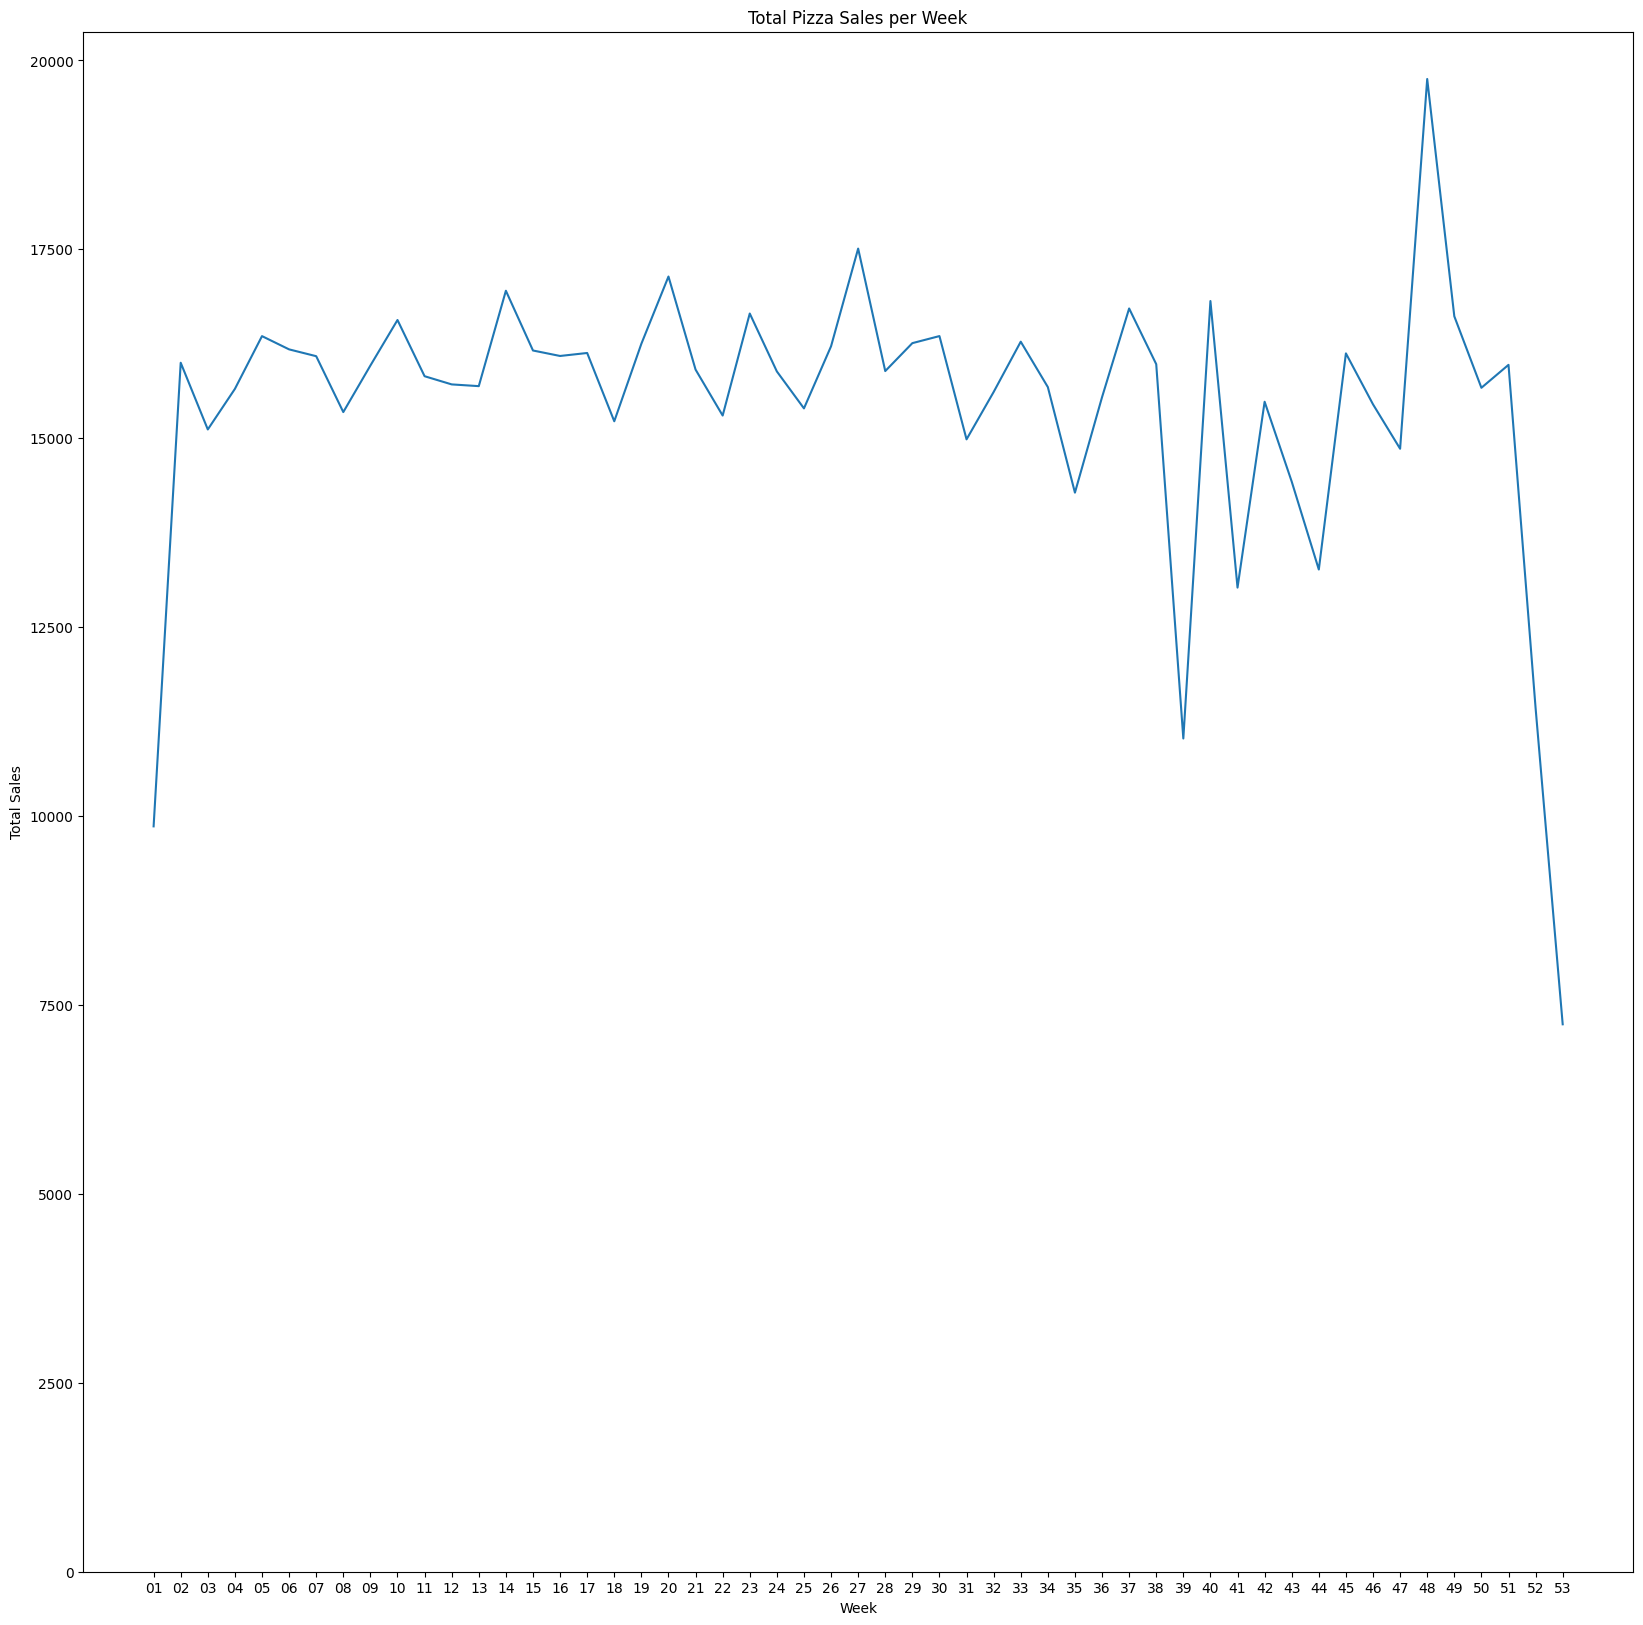

In [25]:
plt.subplots(figsize=(20, 20))

plt.plot(result4['week'], result4['total_price'])
plt.title('Total Pizza Sales per Week')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.ylim(bottom = 0)

plt.show()

# Total pizza sales per month

In [26]:
query5 = '''
SELECT
STRFTIME('%m', t2.date) AS month, 
SUM(t4.price*t1.quantity) AS total_price
FROM order_details AS t1
JOIN pizzas AS t4 ON t1.pizza_id = t4.pizza_id
JOIN pizza_types AS t3 ON t4.pizza_type_id = t3.pizza_type_id
JOIN orders AS t2 ON t1.order_id = t2.order_id
GROUP BY month
ORDER BY month;
'''

result5 = pd.read_sql_query(query5, db)
result5.head()

,month,total_price
0,01,69793.30
1,02,65159.60
2,03,70397.10
3,04,68736.80
4,05,71402.75


In [27]:
month = result5['month'].unique()
result5['month'] = pd.Categorical(result5['month'], categories = month, ordered = True)

In [28]:
result5.dtypes

month          category
total_price     float64
dtype: object

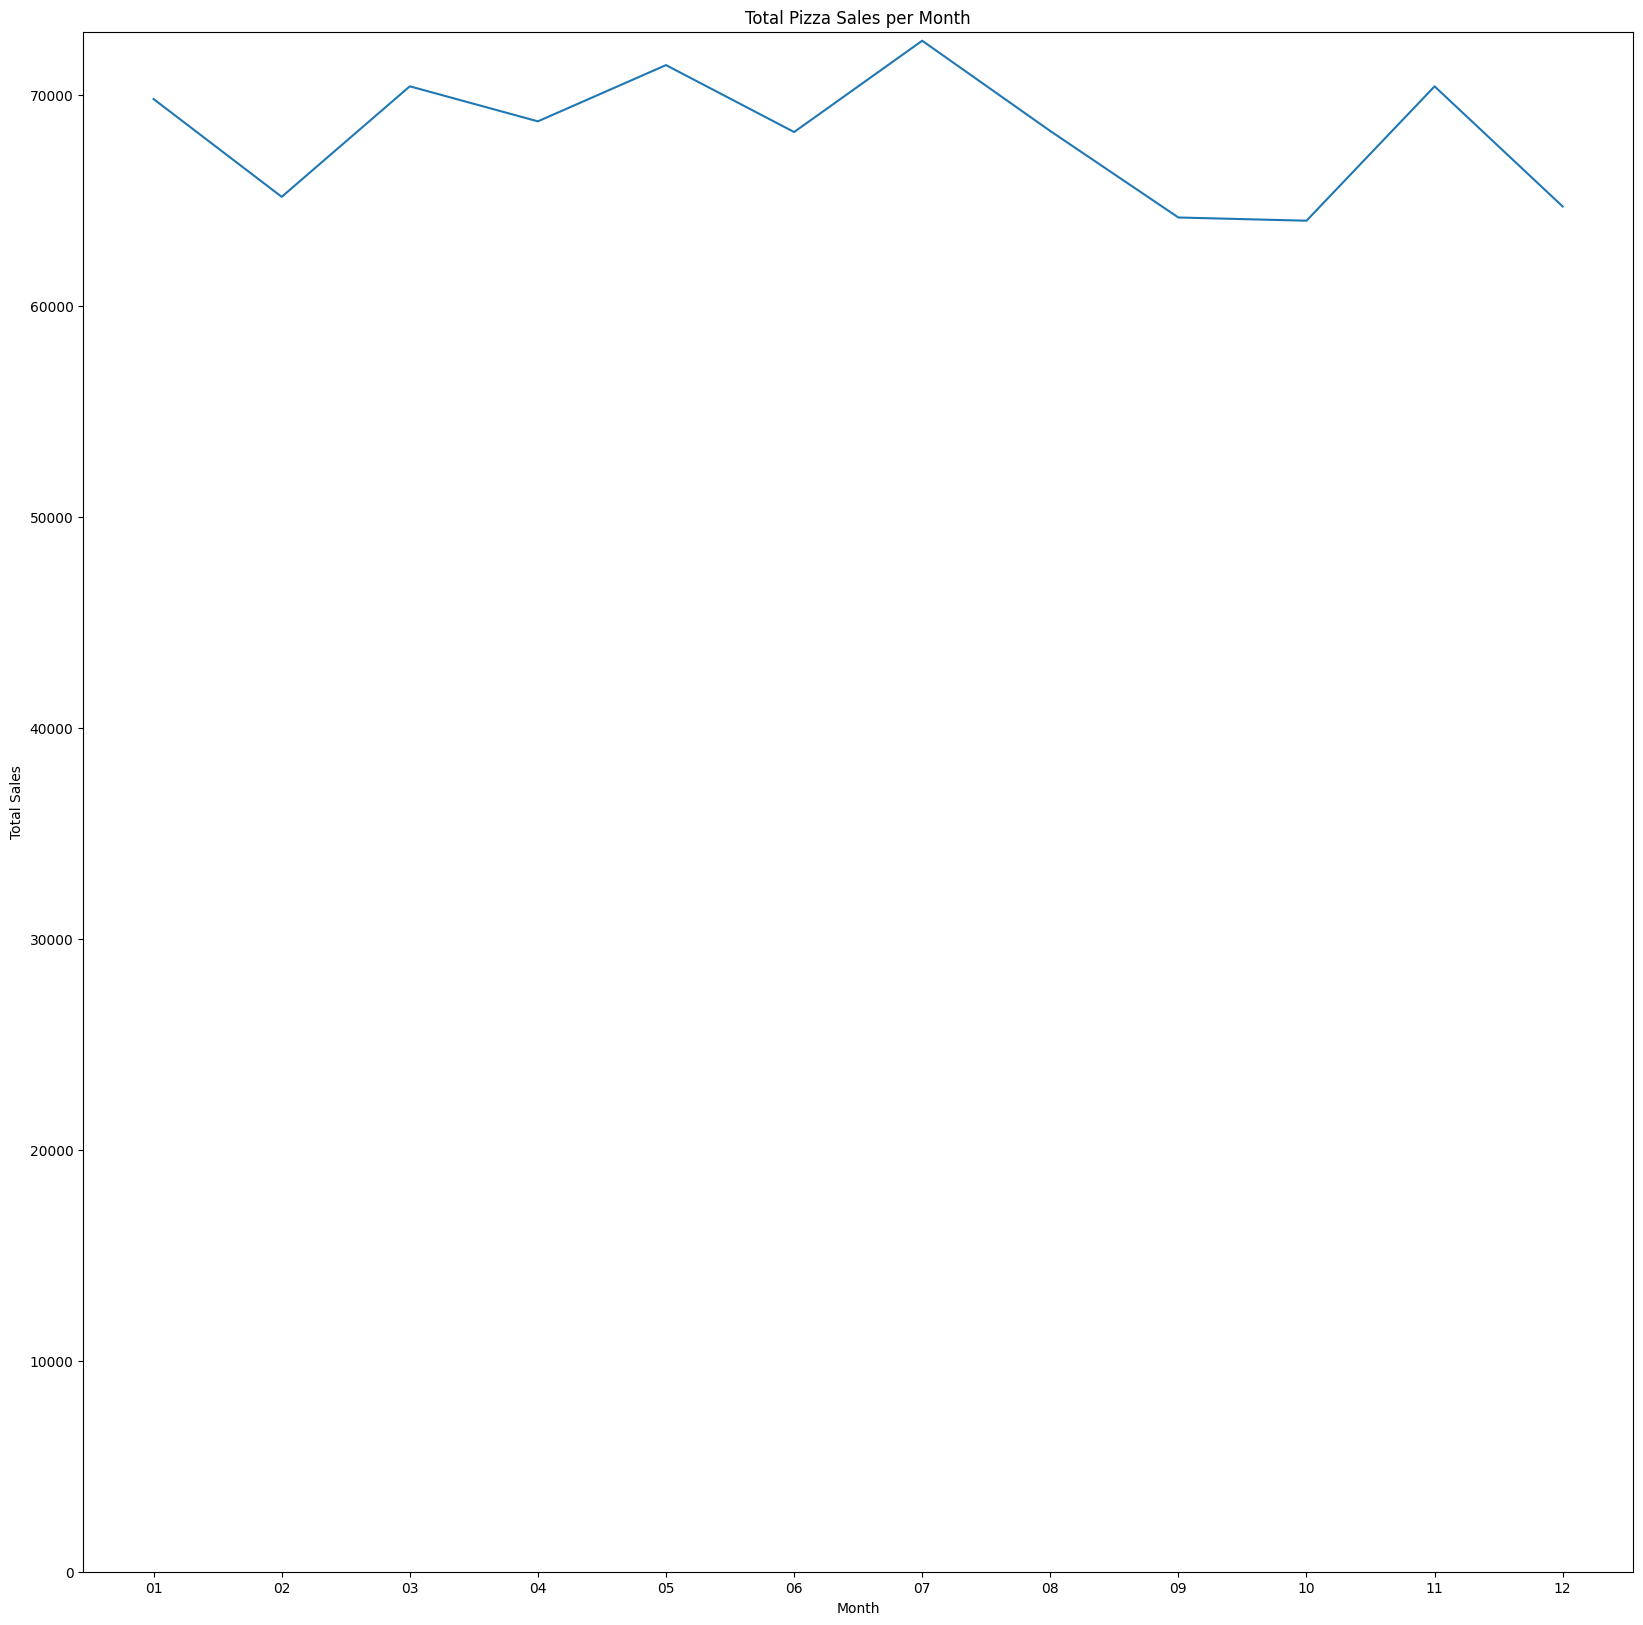

In [29]:
plt.subplots(figsize=(20, 20))

plt.plot(result5['month'], result5['total_price'])
plt.title('Total Pizza Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.ylim(bottom = 0)

plt.show()

# Number of orders per month based on pizza category

In [30]:
query6 = '''
SELECT
STRFTIME('%m', t2.date) AS month, 
t3.category, 
SUM(t1.quantity) AS numberof_orders
FROM order_details AS t1
JOIN pizzas AS t4 ON t1.pizza_id = t4.pizza_id
JOIN pizza_types AS t3 ON t4.pizza_type_id = t3.pizza_type_id
JOIN orders AS t2 ON t1.order_id = t2.order_id
GROUP BY t3.category, month
ORDER BY month;
'''

result6 = pd.read_sql_query(query6, db)
result6.head()

,month,category,numberof_orders
0,01,Chicken,913
1,01,Classic,1257
2,01,Supreme,1044
3,01,Veggie,1018
4,02,Chicken,875


In [31]:
month = result6['month'].unique()
result6['month'] = pd.Categorical(result6['month'], categories = month, ordered = True)

category = result6['category'].unique()
result6['category'] = pd.Categorical(result6['category'], categories = category, ordered = True)

In [32]:
result6.dtypes

month              category
category           category
numberof_orders       int64
dtype: object

/tmp/ipykernel_1490/6168670.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result6 = result6.groupby(['month', 'category'])['numberof_orders'].sum().unstack().fillna(0)


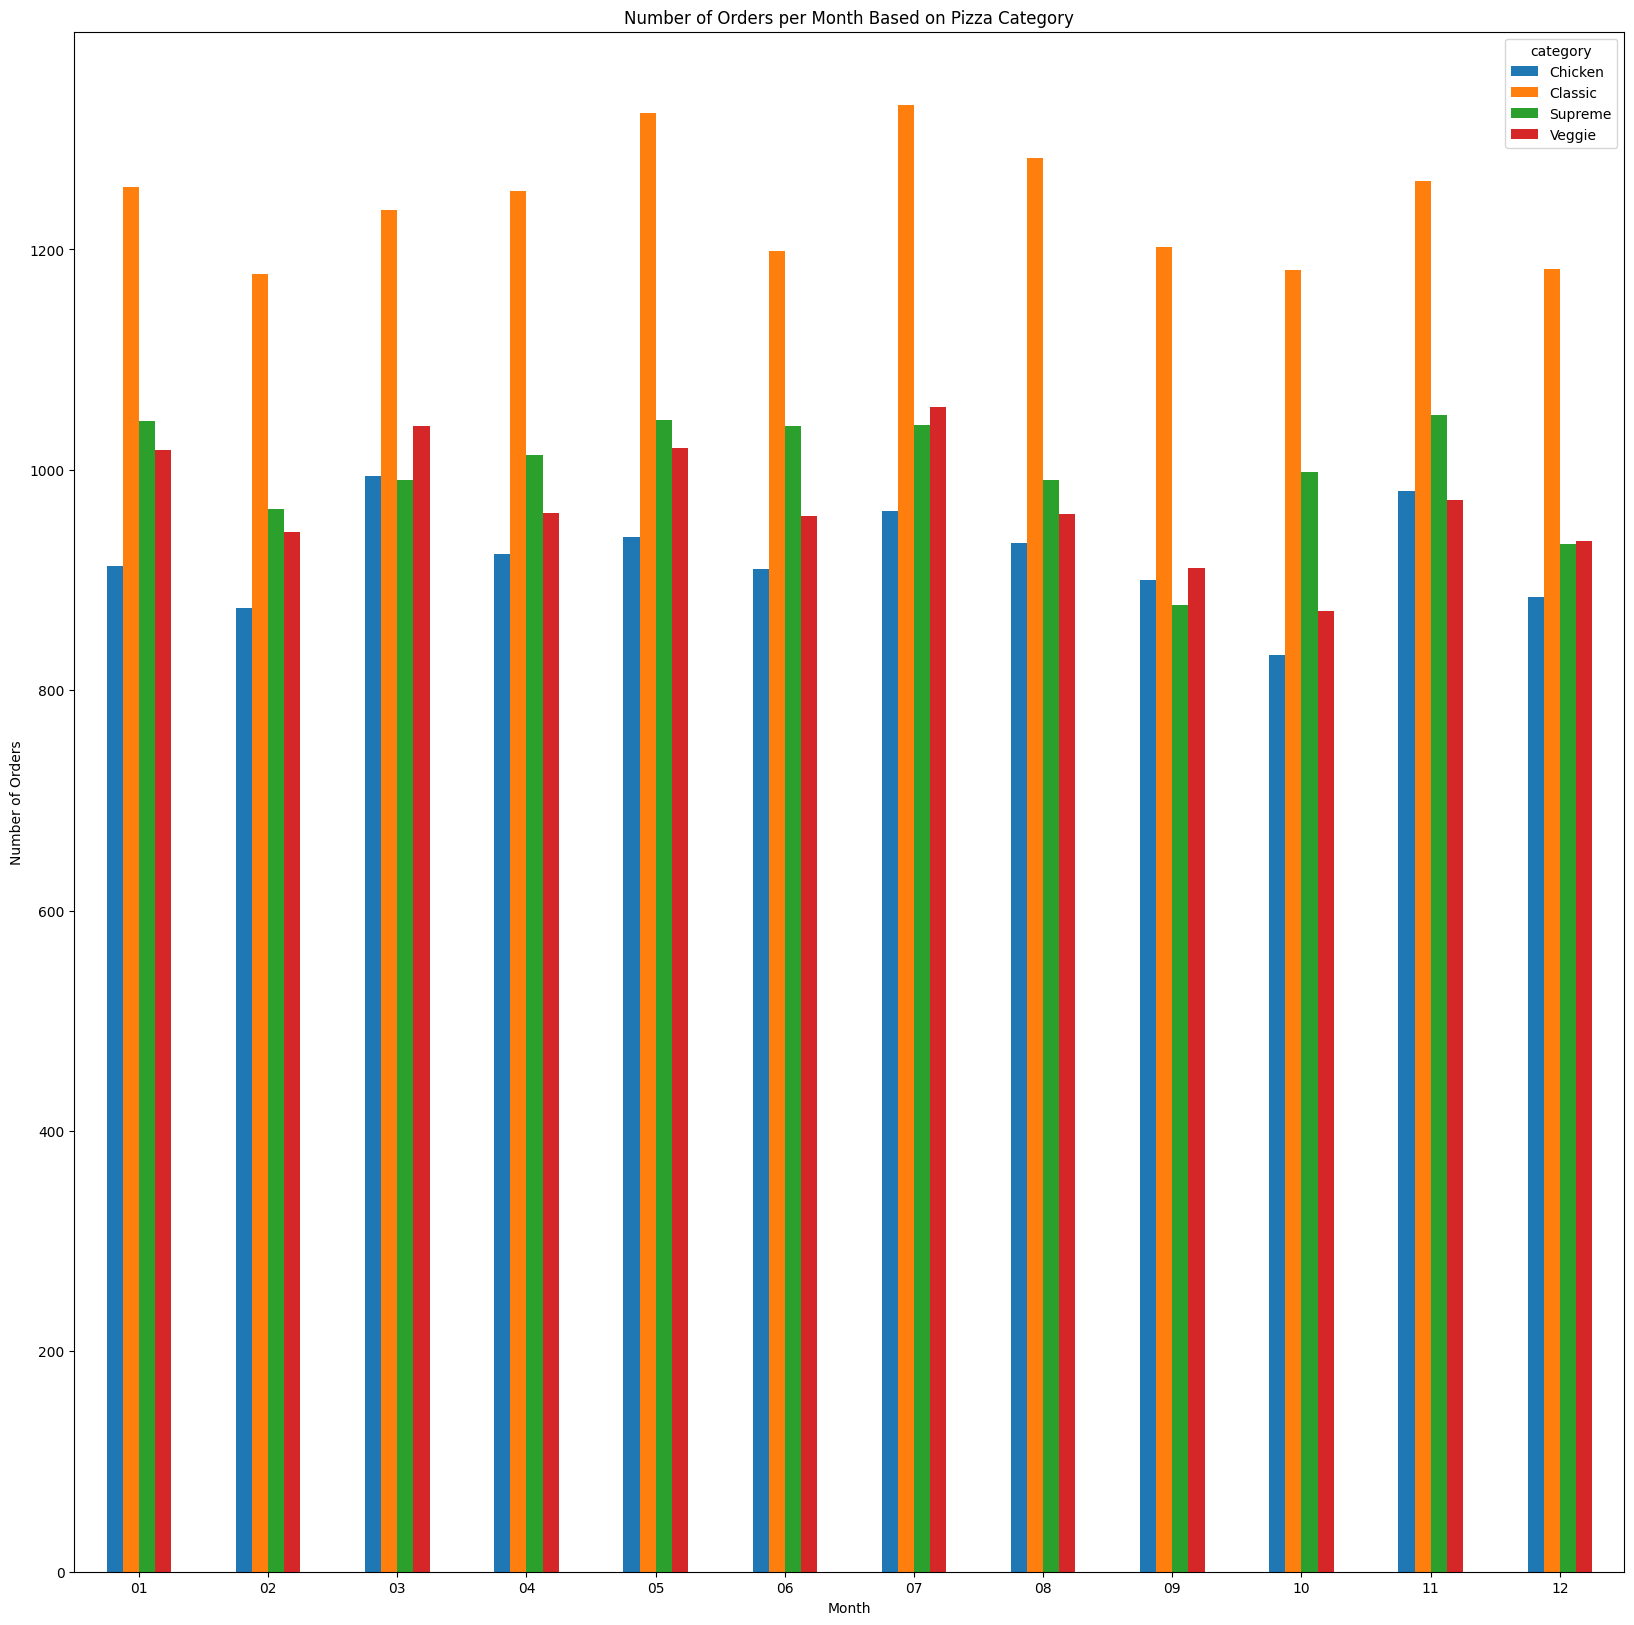

In [33]:
result6 = result6.groupby(['month', 'category'])['numberof_orders'].sum().unstack().fillna(0)

ax = result6.plot(kind = 'bar', figsize = (20, 20))
plt.title('Number of Orders per Month Based on Pizza Category')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation = 0)

plt.show()

# Number of small size orders per month based on pizza category

In [34]:
query7 = '''
SELECT
STRFTIME('%m', t2.date) AS month, 
t3.category, 
SUM(t1.quantity) AS numberof_orders
FROM order_details AS t1
JOIN pizzas AS t4 ON t1.pizza_id = t4.pizza_id
JOIN pizza_types AS t3 ON t4.pizza_type_id = t3.pizza_type_id
JOIN orders AS t2 ON t1.order_id = t2.order_id
GROUP BY t3.category, month
HAVING t4.size = "S"
ORDER BY month;
'''

result7 = pd.read_sql_query(query7, db)
result7.head()

,month,category,numberof_orders
0,02,Classic,1178
1,02,Supreme,964
2,03,Chicken,994
3,05,Chicken,939
4,06,Classic,1199


In [35]:
month = result7['month'].unique()
result7['month'] = pd.Categorical(result7['month'], categories = month, ordered = True)

category = result7['category'].unique()
result7['category'] = pd.Categorical(result7['category'], categories = category, ordered = True)

In [36]:
result7.dtypes

month              category
category           category
numberof_orders       int64
dtype: object

/tmp/ipykernel_1490/1154467421.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result7 = result7.groupby(['month', 'category'])['numberof_orders'].sum().unstack().fillna(0)


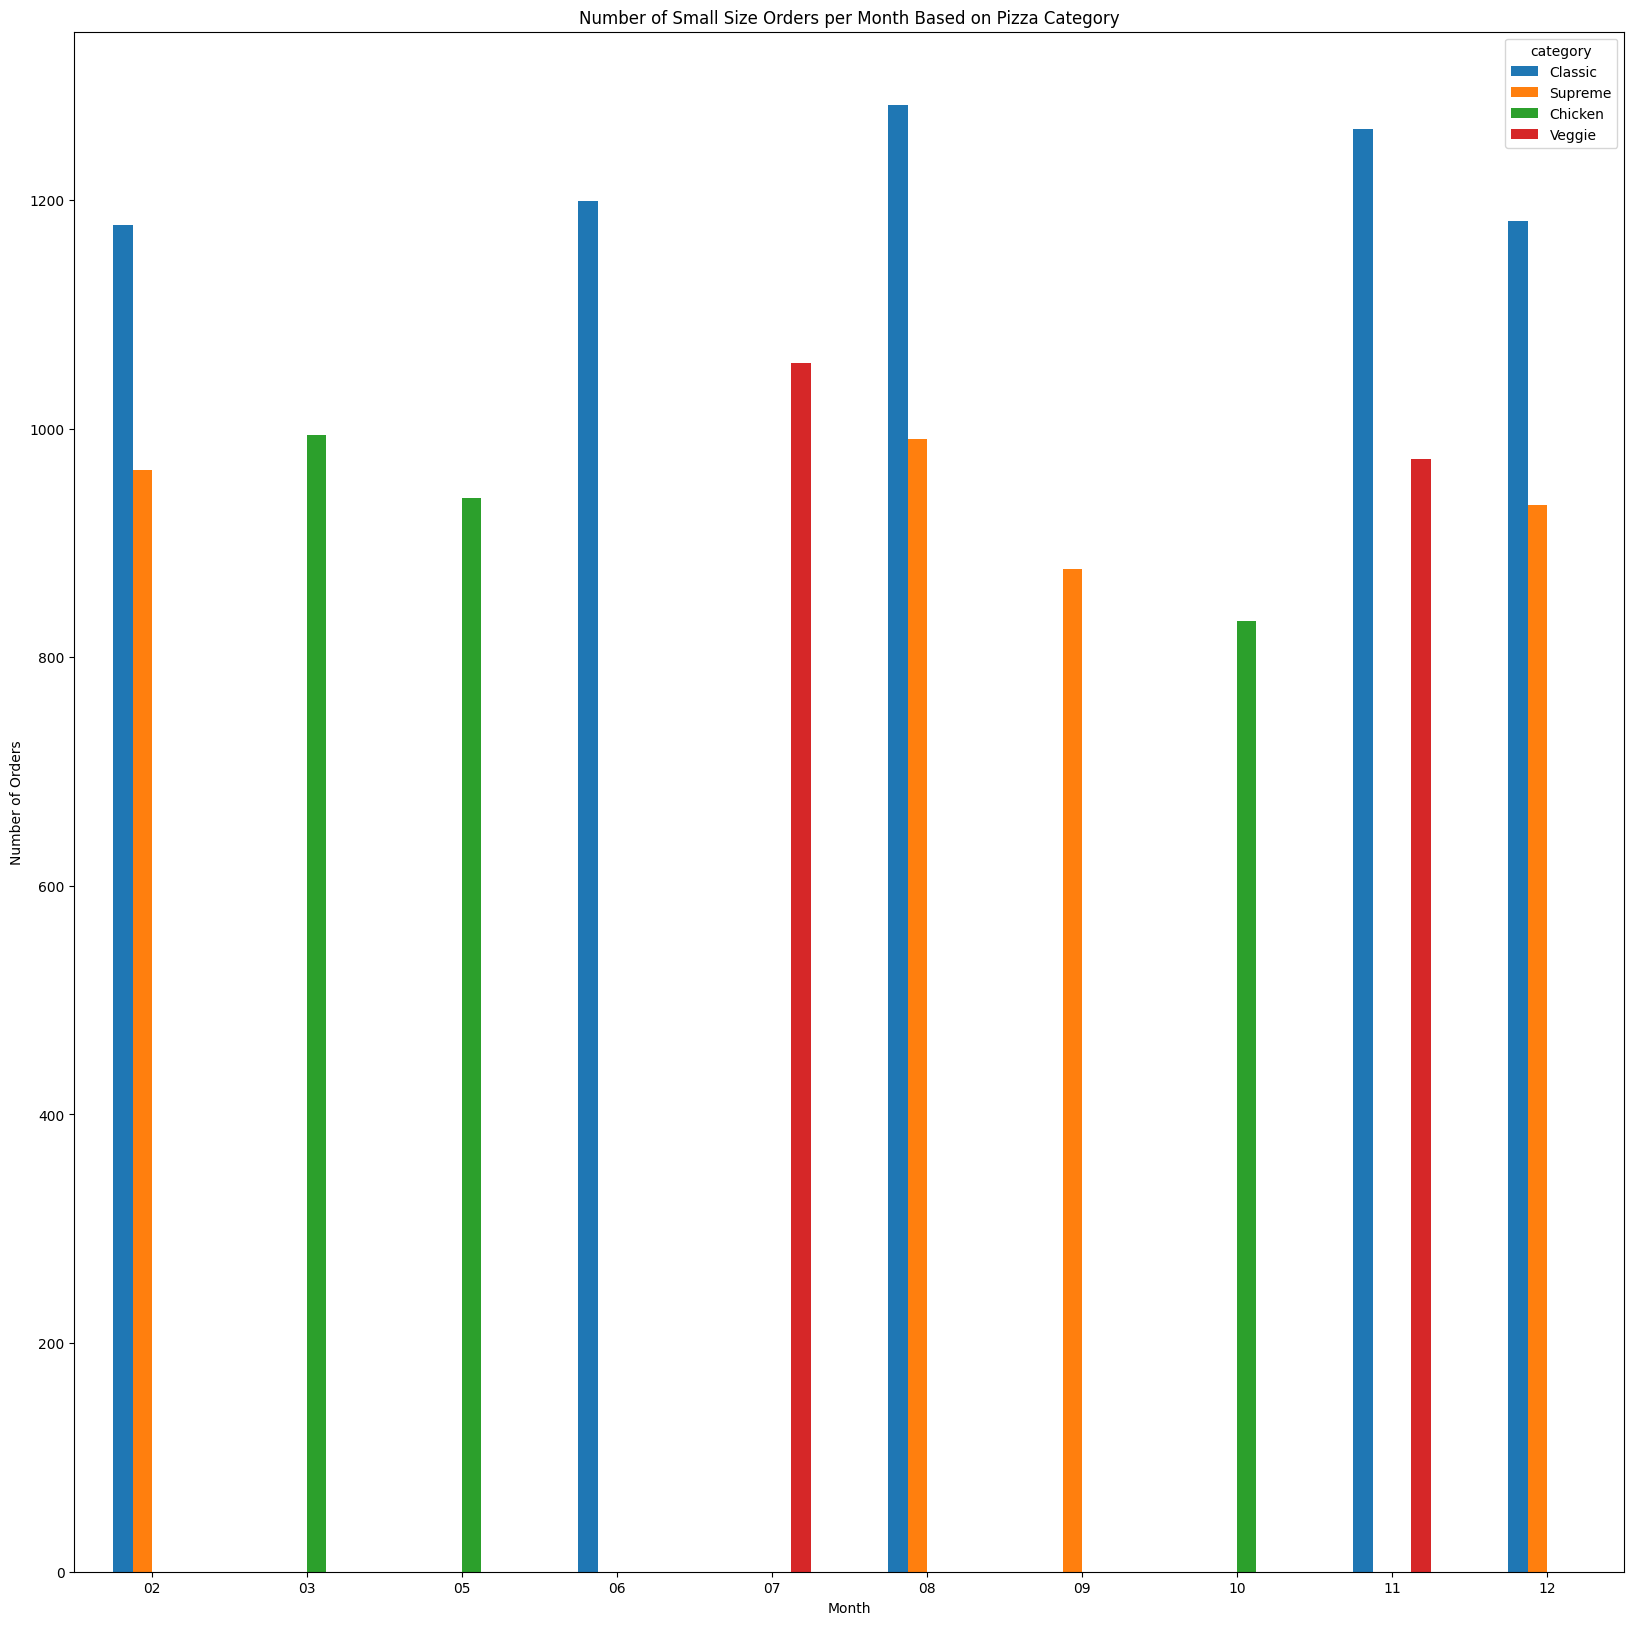

In [37]:
result7 = result7.groupby(['month', 'category'])['numberof_orders'].sum().unstack().fillna(0)

ax = result7.plot(kind = 'bar', figsize = (20, 20))
plt.title('Number of Small Size Orders per Month Based on Pizza Category')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation = 0)

plt.show()

# Number of medium size orders per month based on pizza category

In [38]:
query8 = '''
SELECT
STRFTIME('%m', t2.date) AS month, 
t3.category, 
SUM(t1.quantity) AS numberof_orders
FROM order_details AS t1
JOIN pizzas AS t4 ON t1.pizza_id = t4.pizza_id
JOIN pizza_types AS t3 ON t4.pizza_type_id = t3.pizza_type_id
JOIN orders AS t2 ON t1.order_id = t2.order_id
GROUP BY t3.category, month
HAVING t4.size = "M"
ORDER BY month;
'''

result8 = pd.read_sql_query(query8, db)
result8.head()

,month,category,numberof_orders
0,01,Classic,1257
1,03,Classic,1236
2,03,Supreme,991
3,04,Classic,1253
4,04,Supreme,1013


In [39]:
month = result8['month'].unique()
result8['month'] = pd.Categorical(result8['month'], categories = month, ordered = True)

category = result8['category'].unique()
result8['category'] = pd.Categorical(result8['category'], categories = category, ordered = True)

In [40]:
result8.dtypes

month              category
category           category
numberof_orders       int64
dtype: object

/tmp/ipykernel_1490/3236419670.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result8 = result8.groupby(['month', 'category'])['numberof_orders'].sum().unstack().fillna(0)


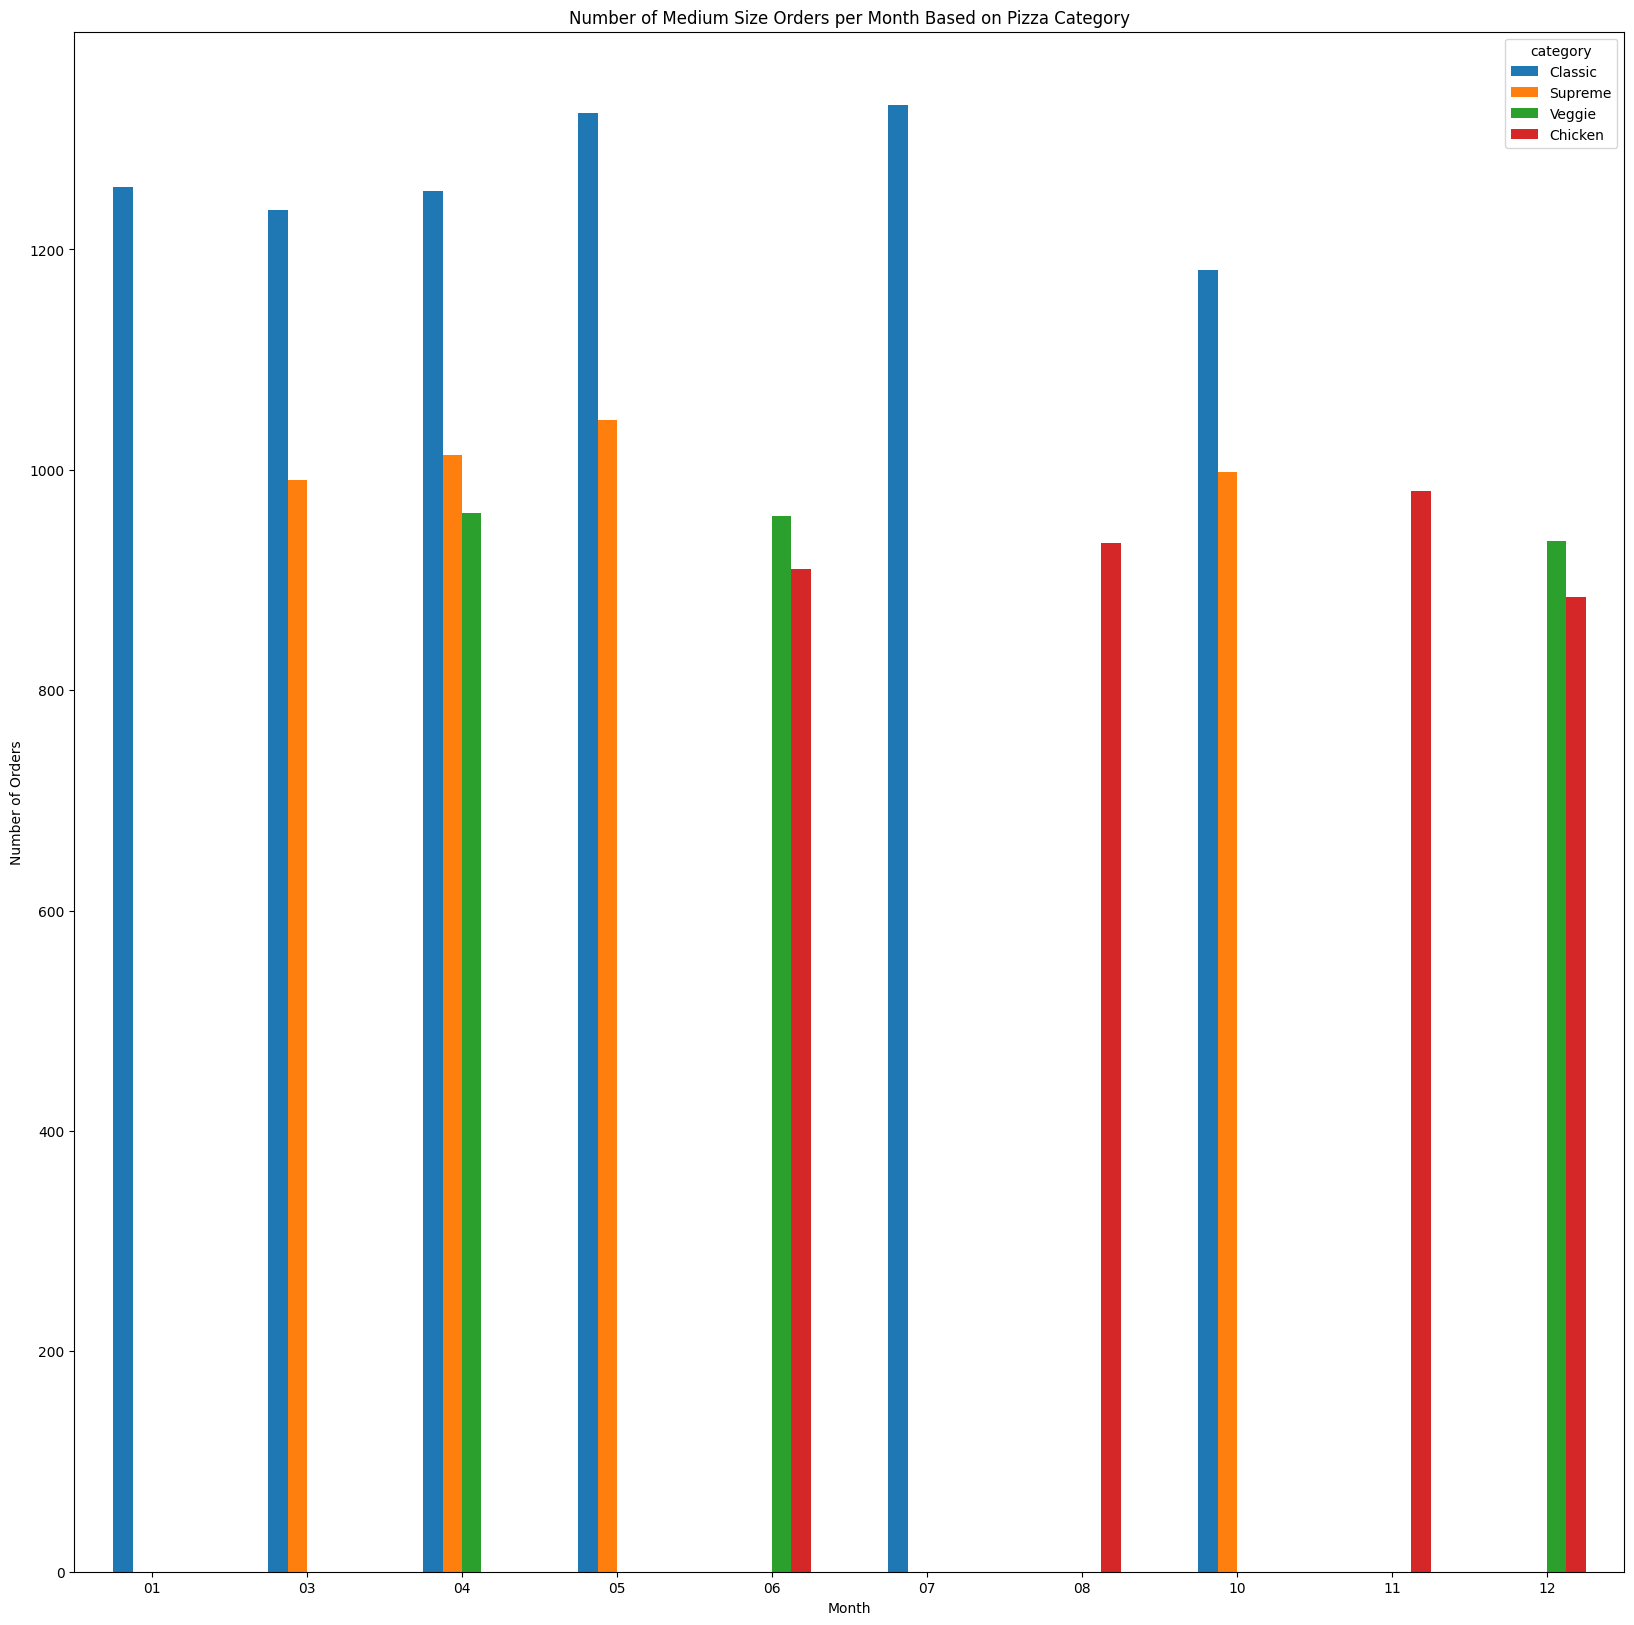

In [41]:
result8 = result8.groupby(['month', 'category'])['numberof_orders'].sum().unstack().fillna(0)

ax = result8.plot(kind = 'bar', figsize = (20, 20))
plt.title('Number of Medium Size Orders per Month Based on Pizza Category')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation = 0)

plt.show()

# Number of large size orders per month based on pizza category

In [42]:
query9 = '''
SELECT
STRFTIME('%m', t2.date) AS month, 
t3.category, 
SUM(t1.quantity) AS numberof_orders
FROM order_details AS t1
JOIN pizzas AS t4 ON t1.pizza_id = t4.pizza_id
JOIN pizza_types AS t3 ON t4.pizza_type_id = t3.pizza_type_id
JOIN orders AS t2 ON t1.order_id = t2.order_id
GROUP BY t3.category, month
HAVING t4.size = "L"
ORDER BY month;
'''

result9 = pd.read_sql_query(query9, db)
result9.head()

,month,category,numberof_orders
0,01,Chicken,913
1,01,Supreme,1044
2,01,Veggie,1018
3,02,Chicken,875
4,02,Veggie,944


In [43]:
month = result9['month'].unique()
result9['month'] = pd.Categorical(result9['month'], categories = month, ordered = True)

category = result9['category'].unique()
result9['category'] = pd.Categorical(result9['category'], categories = category, ordered = True)

In [44]:
result9.dtypes

month              category
category           category
numberof_orders       int64
dtype: object

/tmp/ipykernel_1490/3500963936.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result9 = result9.groupby(['month', 'category'])['numberof_orders'].sum().unstack().fillna(0)


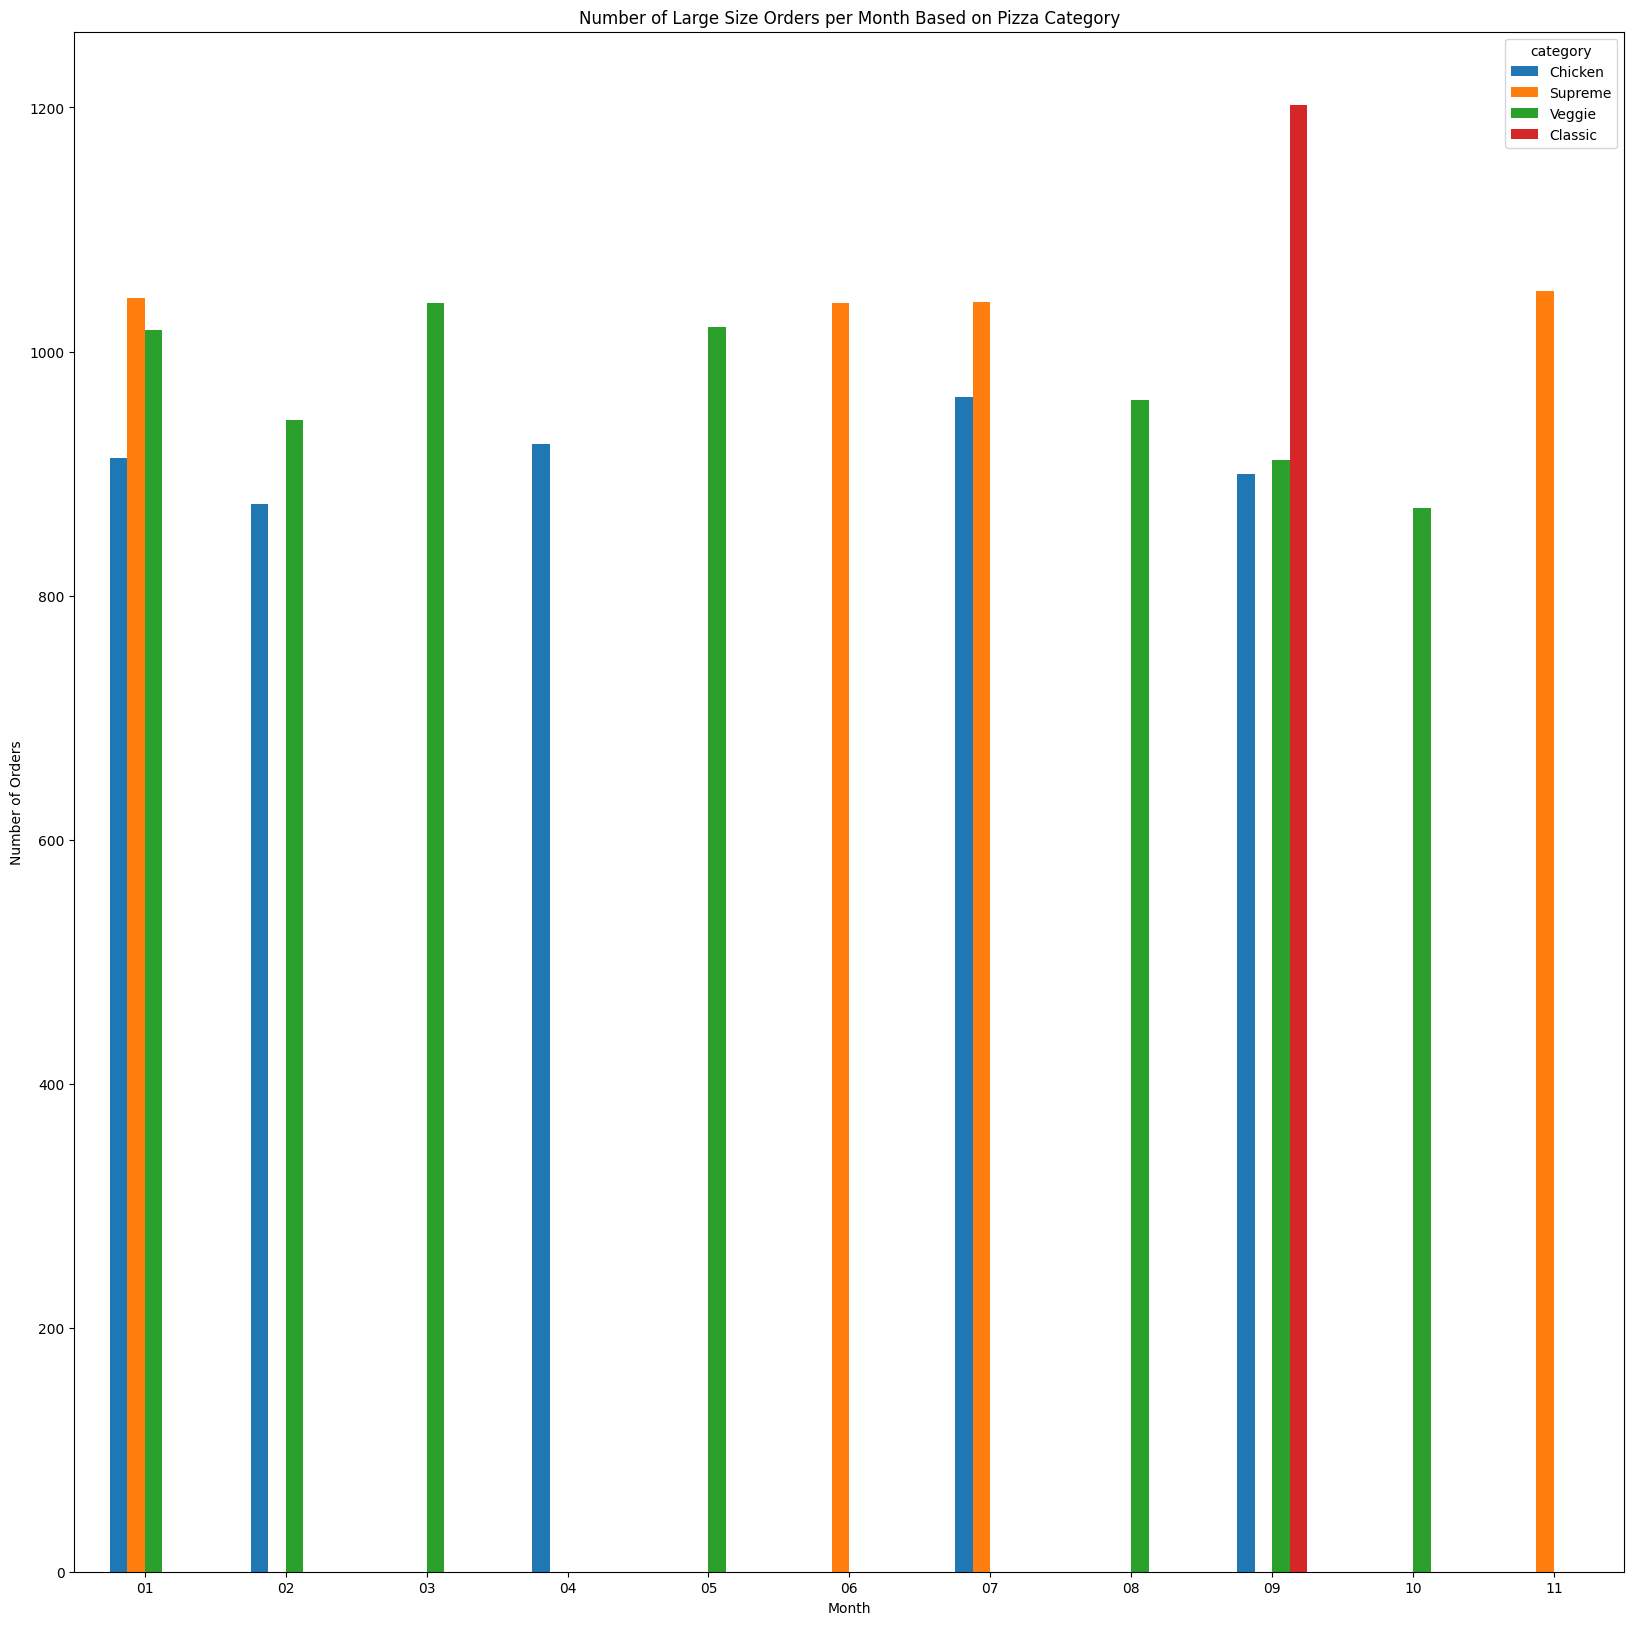

In [45]:
result9 = result9.groupby(['month', 'category'])['numberof_orders'].sum().unstack().fillna(0)

ax = result9.plot(kind = 'bar', figsize = (20, 20))
plt.title('Number of Large Size Orders per Month Based on Pizza Category')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation = 0)

plt.show()